# Platform for Live Crypto Trading with ML

In [1]:
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/Colab Notebooks/sats4u/')

Mounted at /content/drive


In [2]:
! pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 65 kB 3.3 MB/s 
     |████████████████████████████████| 70 kB 9.0 MB/s 
     |████████████████████████████████| 112 kB 9.2 MB/s 
     |████████████████████████████████| 288 kB 56.3 MB/s 
     |████████████████████████████████| 1.1 MB 69.1 MB/s 
     |████████████████████████████████| 45 kB 3.5 MB/s 
     |████████████████████████████████| 271 kB 73.7 MB/s 
     |████████████████████████████████| 144 kB 75.2 MB/s 
     |████████████████████████████████| 94 kB 3.4 MB/s 


In [3]:
import json
import sys
import pandas as pd
import numpy as np
import math
from datetime import datetime
import time
import matplotlib.pyplot as plt
import mplfinance as mpf
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
import tensorflow as tf
import utils.load_crypto_assets as lc

# settings for reproducible results
#os.environ['CUDA_VISIBLE_DEVICES'] = ''
np.random.seed(420)
os.environ['PYTHONHASHSEED'] = '0'
tf.random.set_seed(420)

In [5]:
data_folder = "data/"
asset_details = pd.read_csv(data_folder + 'asset_details.csv')

In [4]:
secret_data_folder = '/content/drive/MyDrive/Colab Notebooks/crypto_project/crypto_data/'
secrets_filename = secret_data_folder+'data.json'

In [6]:
crypto = lc.CryptoData(asset_details,data_folder)
crypto.load_binance_client(secrets_filename,data1_str = 'DATA1',data2_str = 'DATA2i')
crypto.trade_time_units(dt=60,kline_size="15m",starting_date = '1 Mar 2022')

In [7]:
tickers=crypto.asset_details["Ticker"]
tickers = list(tickers[tickers=='BTCUSDT'].values)

In [8]:
data_df = crypto.load_loop_over_cryptos(tickers,save = False)                             

All caught up..!
size of dataset: (167672, 8)
bla


In [ ]:
#sys.path.insert(0, dir_project)

In [ ]:
DT = 60
PERIOD = 15
totimestamp = lambda s: np.int32(time.mktime(datetime.strptime(s, "%d/%m/%Y").timetuple()))
todatetime =  lambda timestamp: datetime.fromtimestamp(timestamp)

In [ ]:
asset_details_ticks = lc.assets_with_tickers(asset_details)
tickers = asset_details_ticks["Ticker"].values
kline_size = "15m"
DT_DAILY, minute, hour, day, week, month, year = lc.trade_time_units(DT)

In [ ]:
secrets_filename = data_folder+'data.json'
STARTING_DATE = '1 Mar 2017'
binsizes, batch_size, STARTING_DATE = lc.binance_api_constants(starting_date = STARTING_DATE)
print(STARTING_DATE)
binance_client, binance_api_key, binance_api_secret = lc.load_binance_client(secrets_filename)

1 Mar 2017


In [ ]:
data_df = lc.load_loop_over_cryptos(data_folder, tickers, binsizes, kline_size, 
                           binance_client, binance_api_key, binance_api_secret, 
                           asset_details_ticks, save = True, starting_date = STARTING_DATE)

data_df["timestamp"]=(data_df["timestamp"]/1000).astype(int)
data_df["timestamp_dummy"] = data_df["timestamp"]
data_df = data_df.set_index("timestamp").copy()
data_df = data_df.rename(columns={"timestamp_dummy":"timestamp"})
data_df["Future Date"] = (data_df["timestamp"]+DT*PERIOD).apply(todatetime).values
data_df["Date"] = (data_df["timestamp"]+DT).apply(todatetime).values
#data_df["Future Date"] = (data_df["timestamp"]+DT*PERIOD).apply(todatetime).values


1 Mar 2017
1 Mar 2017
starting time: 01 Mar 2017 00:00:00
ending time: 10 May 2022 18:30:00
All caught up..!
size of dataset: (85712, 8)
1 Mar 2017
1 Mar 2017
starting time: 01 Mar 2017 00:00:00
ending time: 10 May 2022 18:30:00
All caught up..!
size of dataset: (157547, 8)
1 Mar 2017
1 Mar 2017
starting time: 01 Mar 2017 00:00:00
ending time: 10 May 2022 18:30:00
All caught up..!
size of dataset: (165294, 8)
1 Mar 2017
1 Mar 2017
starting time: 01 Mar 2017 00:00:00
ending time: 10 May 2022 18:30:00


In [ ]:
TEST = False

if TEST:
    candles = pd.read_csv(dir_project+'BTCUSD_data.csv')
    candles['time'] = pd.to_datetime(candles['time'])
    candles.set_index("time",inplace = True)
    candles.rename(columns = {"low":"Low","high":"High","open":"Open","close":"Close","volume":"Volume"},inplace=True)
else:
    candles = data_df[["Date","LowBitcoin","HighBitcoin","OpenBitcoin","CloseBitcoin","VolumeBitcoin"]]
    candles.set_index("Date",inplace = True)
    candles.rename(columns = {"LowBitcoin":"Low","HighBitcoin":"High","OpenBitcoin":"Open","CloseBitcoin":"Close","VolumeBitcoin":"Volume"},inplace=True)

#  "Wick Candles"

---

# Data Exploration


In [ ]:
print('Available Dates:', candles.iloc[0].name, '-', candles.iloc[-1].name)
print(len(candles.index), 'candles')

Available Dates: 2022-03-01 00:01:00 - 2022-05-10 18:16:00
6794 candles


In [ ]:
candles.describe()

,Low,High,Open,Close,Volume
count,101789.000000,101789.000000,101789.000000,101789.000000,101789.000000
mean,41024.621038,41060.575151,41042.617268,41042.500377,34.809949
std,3224.833646,3221.291951,3223.039143,3223.173837,58.720105
min,29730.400000,29915.820000,29841.120000,29841.120000,0.000000
25%,39004.410000,39041.200000,39022.470000,39022.480000,10.418500
50%,40527.290000,40560.000000,40542.600000,40542.530000,19.022060
75%,43136.850000,43178.800000,43155.720000,43156.710000,36.741680
max,48120.010000,48189.840000,48164.320000,48164.320000,2114.132430


## Charts

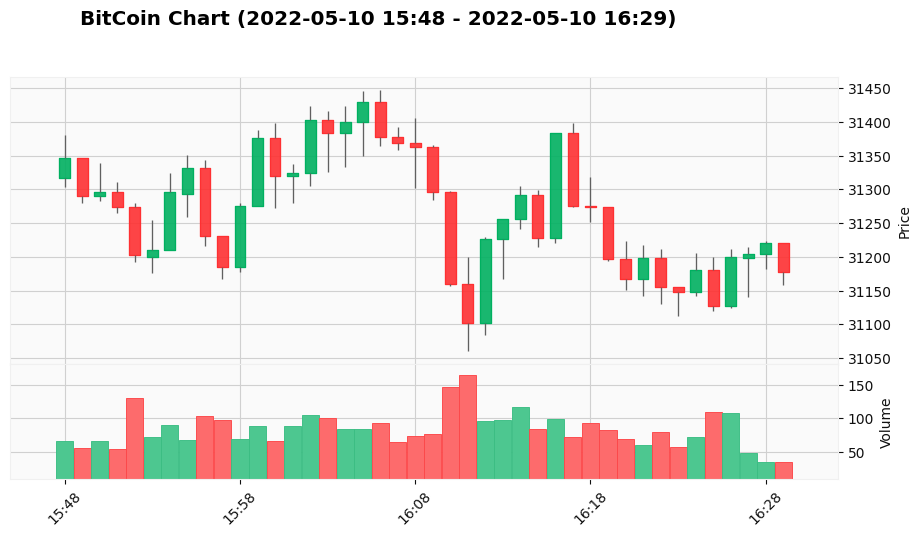

In [ ]:
title = 'BitCoin Chart (' + str(candles.iloc[-42].name)[:16] + ' - ' + str(candles.iloc[-1].name)[:16]+')'

mpf.plot(
    candles.iloc[-42:], 
    type='candle', 
    volume=True, 
    figratio=(24,12), 
    style='yahoo', 
    title=title
)

# Technical Analysis

## Moving Averages

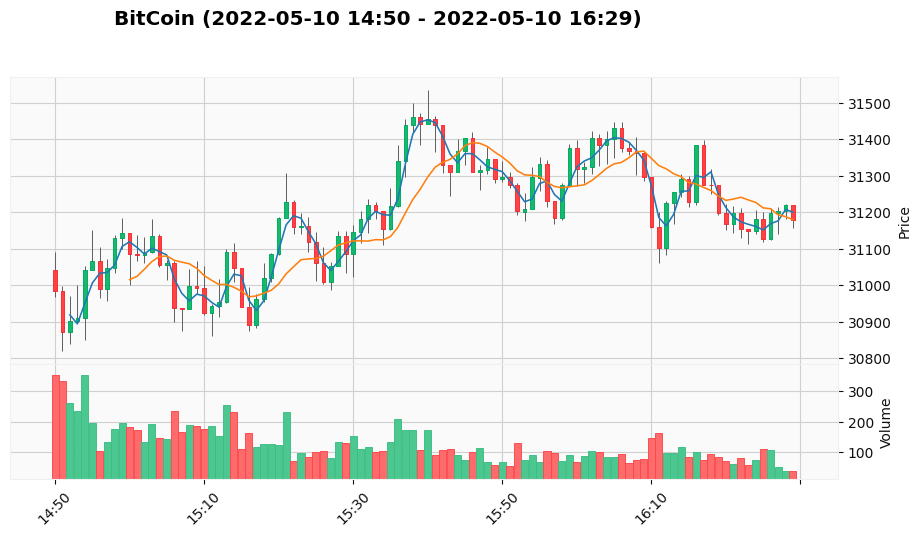

In [ ]:
title = 'BitCoin (' + str(candles.iloc[-100].name)[:16] + ' - ' + str(candles.iloc[-1].name)[:16]+')'

mpf.plot(
    candles.iloc[-100:], 
    mav=(3, 11), 
    type='candle', 
    volume=True, 
    figratio=(24,12), 
    style='yahoo', 
    title=title
)

##  Bollinger Bands

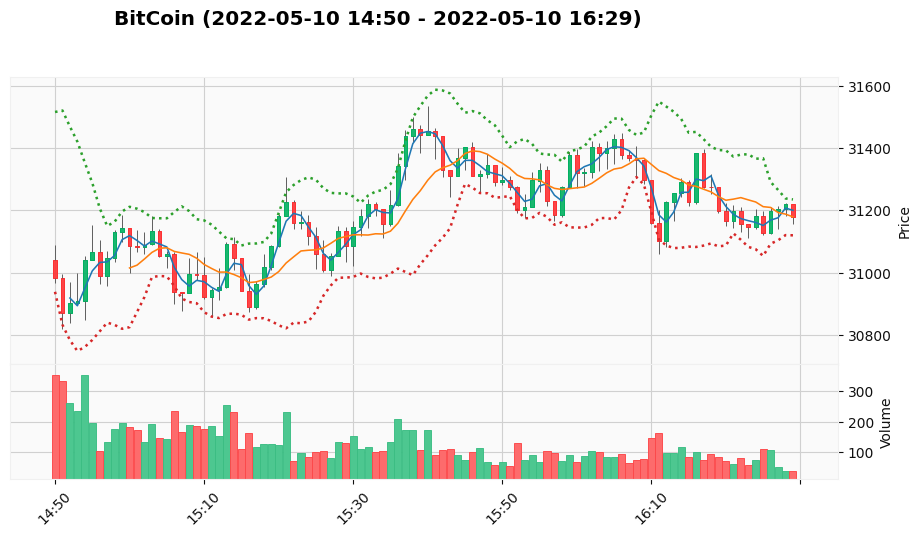

In [ ]:
mean = candles['Close']
mean = mean.rolling(window=10).mean()
std_dev = candles['Close']
std_dev = std_dev.rolling(window=10).std()
candles['UpperBB'] = mean + (2 * std_dev)
candles['LowerBB'] = mean - (2 * std_dev)
bollinger_bands = candles[['UpperBB', 'LowerBB']]

bollinger_bands_plot = mpf.make_addplot(bollinger_bands[-100:], linestyle='dotted')
mpf.plot(
    candles.iloc[-100:], 
    type='candle',
    mav=(3, 11),
    volume=True, 
    figratio=(24,12), 
    style='yahoo', 
    addplot=bollinger_bands_plot, 
    title=title
)

## Price to Volume Ratio

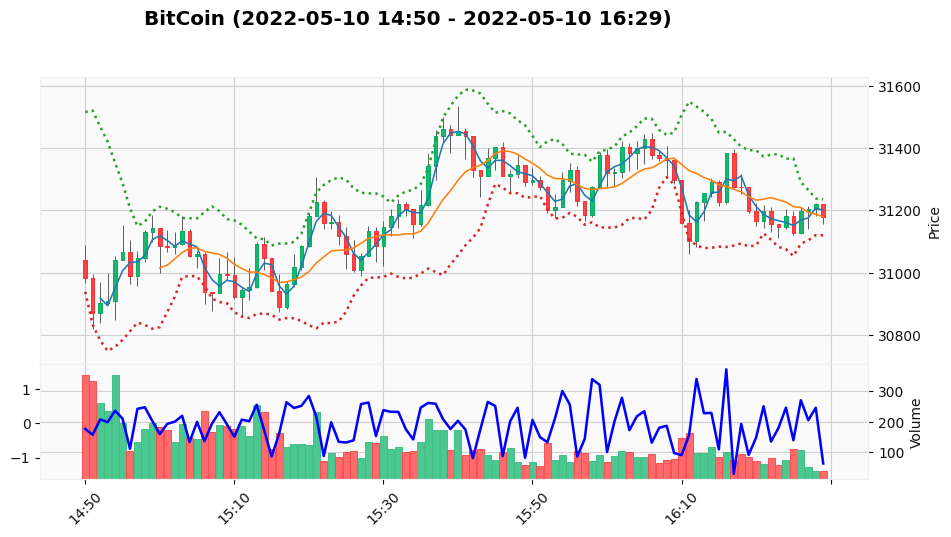

In [ ]:
price_over_volume = (candles['Close'] - candles['Open']) / candles['Volume']

candles['price_over_vol'] = price_over_volume

price_over_volume_plot = mpf.make_addplot(price_over_volume[-100:], panel=1, color='blue')
mpf.plot(
    candles.iloc[-100:],
    type='candle', 
    volume=True, 
    mav=(3, 11),
    figratio=(24,12), 
    style='yahoo', 
    addplot=[bollinger_bands_plot, price_over_volume_plot],
    title=title
)

## Volume Acceleration

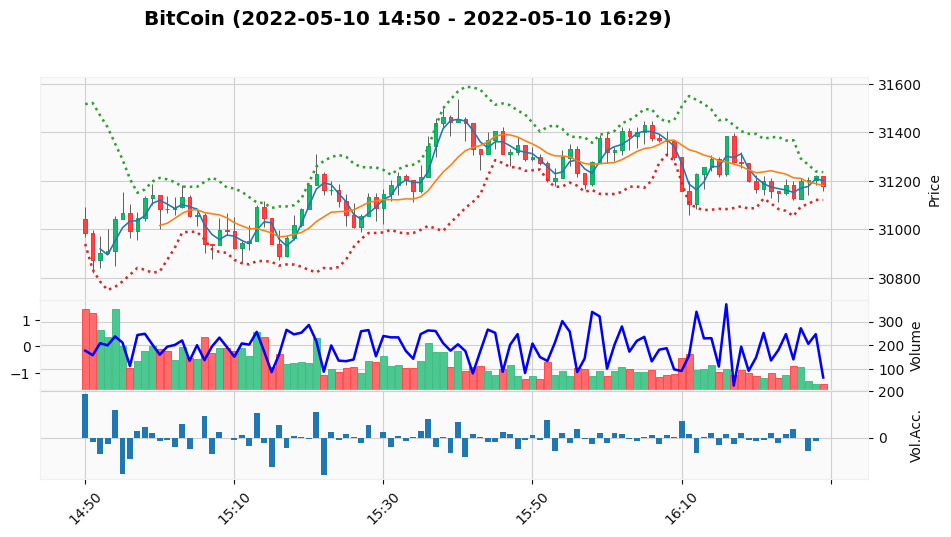

In [ ]:
volume_diff = candles['Volume'] - candles['Volume'].shift(1)
volume_diff_plot = mpf.make_addplot(volume_diff[-100:], panel=2, type='bar', ylabel='Vol.Acc.')
candles['vol_diff'] = volume_diff

mpf.plot(
    candles.iloc[-100:],  
    type='candle', 
    volume=True, 
    mav=(3, 11),
    figratio=(24,12), 
    style='yahoo', 
    addplot=[
        bollinger_bands_plot, 
        price_over_volume_plot, 
        volume_diff_plot
    ], 
    title=title
)

# Generate timeseries
## Normalize data

In [ ]:
scaler = MinMaxScaler(feature_range=(0.2, 0.8))
candles_norm = scaler.fit_transform(candles)

print(candles.iloc[0])
print('  ------')
print(candles_norm[0])

Low               43155.680000
High              43226.930000
Open              43160.000000
Close             43179.840000
Volume               99.846940
UpperBB                    NaN
LowerBB                    NaN
price_over_vol        0.198704
vol_diff                   NaN
Name: 2022-03-01 00:01:00, dtype: float64
  ------
[0.63802821 0.6370503  0.63613168 0.63678135 0.228337          nan
        nan 0.49933976        nan]


## Remove NaNs
due to Bolliger Bands and moving averages

In [ ]:
candles.isna().sum()

Low               0
High              0
Open              0
Close             0
Volume            0
UpperBB           9
LowerBB           9
price_over_vol    1
vol_diff          1
dtype: int64

In [ ]:
candles_norm = candles_norm[10:]

if not TEST:
    RECENT_DATA = 60000
    candles_norm = candles_norm[-RECENT_DATA:]
    print(len(candles_norm))


60000


## Generate dataset based on timeseries

In [ ]:
x_candles = []
x_time = []
y = []

step_back = 48

for i in range(len(candles_norm) - step_back):
    example_candles = []
    example_time = []

    if TEST:
        for o in range(0, step_back):
            example_candles.append(candles_norm[i + o])
            t = candles.iloc[10 + i + o].name
            example_time.append([t.hour / 24, t.weekday() / 7])
    else:
        for o in range(0, step_back):
            example_candles.append(candles_norm[i + o])
            t = candles.iloc[10 + i + o].name
            example_time.append([t.minute / 60., t.hour/24])      

    x_candles.append(example_candles)
    x_time.append(example_time)
    y.append(candles_norm[i+step_back][3])

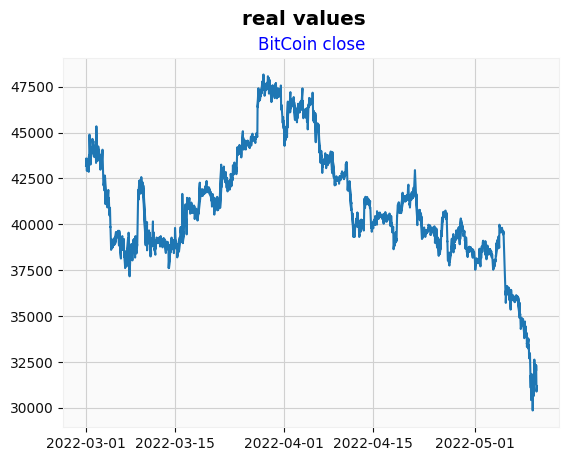

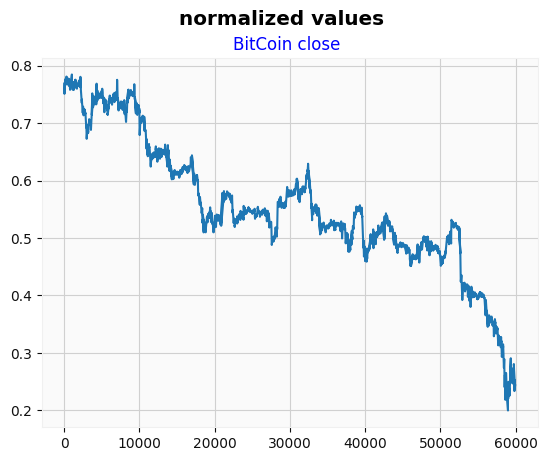

In [ ]:
plt.plot(candles['Close'])
plt.title('BitCoin close', fontdict={
    'fontsize': 12,
    'fontweight': 1,
    'color': 'blue',
    'verticalalignment': 'baseline',
    'horizontalalignment': 'center'
})
plt.suptitle('real values')
plt.show()

plt.plot(y)
plt.title('BitCoin close ', fontdict={
    'fontsize': 12,
    'fontweight': 1,
    'color': 'blue',
    'verticalalignment': 'baseline',
    'horizontalalignment': 'center'
})
plt.suptitle('normalized values')
plt.show()

In [ ]:
np.shape(x_candles)

(59952, 48, 9)

### Create training and validation datasets

In [ ]:
split_point = int(len(x_candles) * 0.9)

x_train_candles = np.asarray(x_candles[:split_point], dtype=np.float32)
x_train_time = np.asarray(x_time[:split_point], dtype=np.float32)
y_train = np.asarray(y[:split_point], dtype=np.float32)

x_test_candles = np.asarray(x_candles[split_point:], dtype=np.float32)
x_test_time = np.asarray(x_time[split_point:], dtype=np.float32)
y_test = np.asarray(y[split_point:], dtype=np.float32)

In [ ]:
print(x_train_candles.shape)
print(x_train_time.shape)
print(y_train.shape)
print('from', candles.iloc[0].name, 'to', candles.iloc[split_point + step_back].name)

print('   --------')

print(x_test_candles.shape)
print(x_test_time.shape)
print(y_test.shape)
print('from', candles.iloc[split_point + step_back + 1].name, 'to', candles.iloc[-step_back].name)

(53956, 48, 9)
(53956, 48, 2)
(53956,)
from 2022-03-01 00:01:00 to 2022-04-07 12:05:00
   --------
(5996, 48, 9)
(5996, 48, 2)
(5996,)
from 2022-04-07 12:06:00 to 2022-05-10 15:42:00


## Implement predictive model
---

#### Use the"Swish" activation function

In [ ]:
def swish(x):
    return keras.backend.sigmoid(x) * x

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Candles (InputLayer)           [(None, 48, 9)]      0           []                               
                                                                                                  
 conv1d_18 (Conv1D)             (None, 48, 32)       896         ['Candles[0][0]']                
                                                                                                  
 conv1d_20 (Conv1D)             (None, 48, 32)       2048        ['Candles[0][0]']                
                                                                                                  
 conv1d_22 (Conv1D)             (None, 48, 32)       3776        ['Candles[0][0]']                
                                                                                            

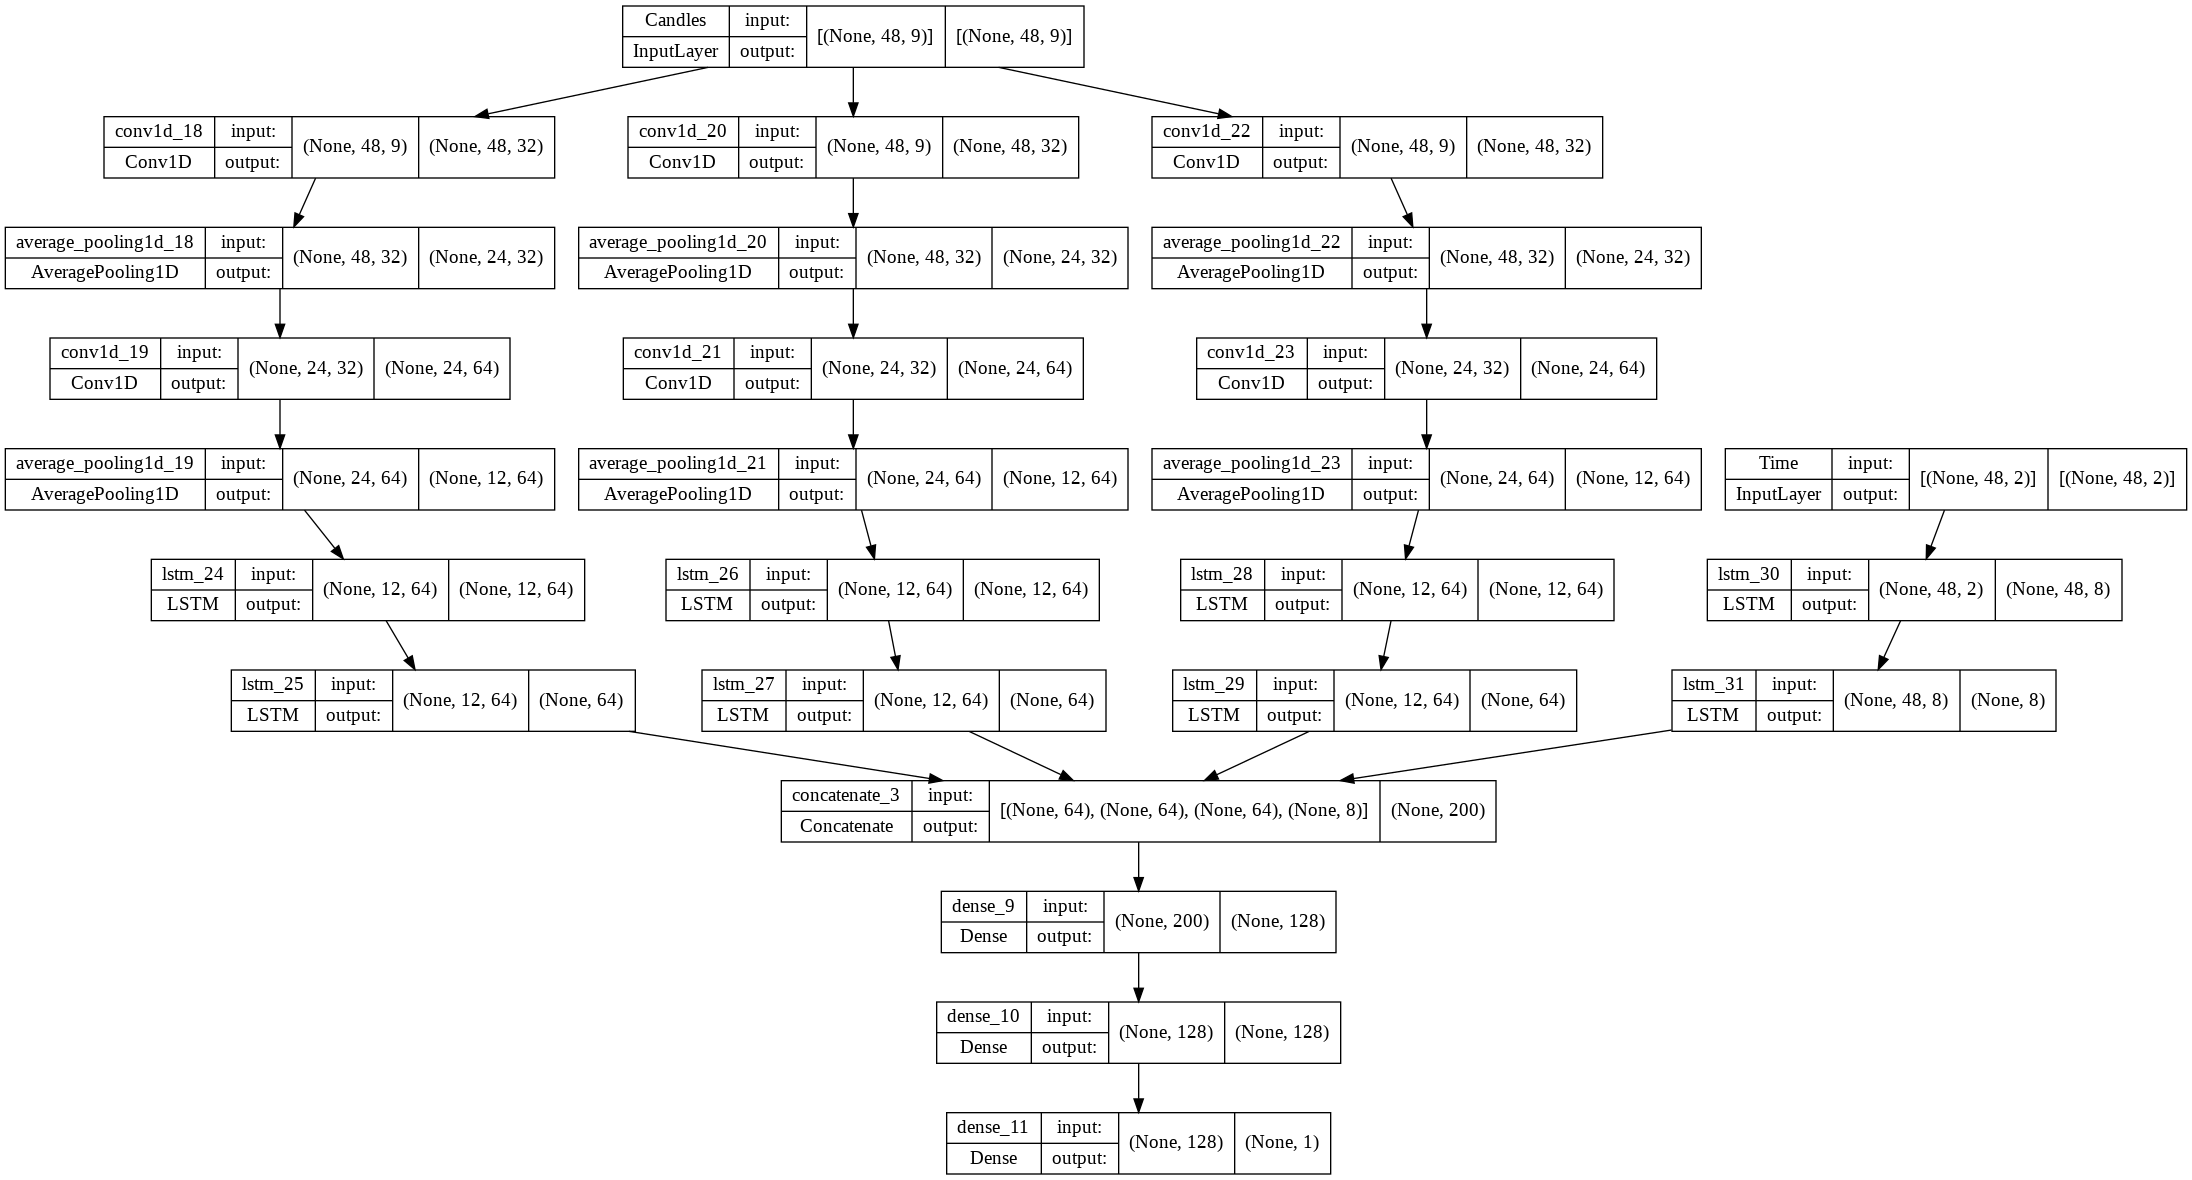

In [ ]:
def get_conv_lstm_block(input, kernel_size_1, kernel_size_2):
    conv_1 = keras.layers.Conv1D(
        filters=32,
        kernel_size=kernel_size_1,
        activation=keras.activations.swish,
        padding='same'
    )(input)
    average_1 = keras.layers.AveragePooling1D()(conv_1)
    
    conv_2 = keras.layers.Conv1D(
        filters=64,
        kernel_size=kernel_size_2,
        activation=keras.activations.swish,
        padding='same'
    )(average_1)
    average_2 = keras.layers.AveragePooling1D()(conv_2)
    
    lstm_1 = keras.layers.LSTM(units=64, return_sequences=True)(average_2)
    lstm_2 = keras.layers.LSTM(units=64)(lstm_1)
    
    return lstm_2


input_candles = keras.Input(shape=(x_train_candles.shape[1], x_train_candles.shape[2]), name='Candles')
input_time = keras.Input(shape=(x_train_time.shape[1], x_train_time.shape[2]), name='Time')

conv_1 = get_conv_lstm_block(input_candles, kernel_size_1=3, kernel_size_2=3)
conv_2 = get_conv_lstm_block(input_candles, kernel_size_1=7, kernel_size_2=7)
conv_3 = get_conv_lstm_block(input_candles, kernel_size_1=13, kernel_size_2=13)

lstm_time_1 = keras.layers.LSTM(units=8, return_sequences=True)(input_time)
lstm_time_2 = keras.layers.LSTM(units=8)(lstm_time_1)

conc = keras.layers.Concatenate(axis=-1)([conv_1, conv_2, conv_3, lstm_time_2])

dense_1 = keras.layers.Dense(units=128, activation=keras.activations.swish)(conc)
dense_2 = keras.layers.Dense(units=128, activation=keras.activations.swish)(dense_1)

output = keras.layers.Dense(units=1, activation=keras.activations.linear)(dense_2)

model = keras.Model(inputs=[input_candles, input_time], outputs=output)

model.compile(optimizer=keras.optimizers.Adam(), loss=keras.losses.mean_absolute_error)

model.summary()
keras.utils.plot_model(model, "conv_lstm_net.png", show_shapes=True)

In [ ]:
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='weights/weights',
    save_weights_only=True,
    monitor='loss',
    mode='min',
    save_best_only=True
)

history = model.fit(
    [x_train_candles, x_train_time],
    y_train,
    epochs=20,
    batch_size=4096,
    validation_data=(
        [x_test_candles, x_test_time],
        y_test
    ),
    callbacks=model_checkpoint_callback
)

model.load_weights('weights/weights')

Epoch 1/20
14/14 [==============================] - 14s 291ms/step - loss: 0.1841 - val_loss: 0.1727
Epoch 2/20
14/14 [==============================] - 1s 86ms/step - loss: 0.0529 - val_loss: 0.0902
Epoch 3/20
14/14 [==============================] - 1s 86ms/step - loss: 0.0264 - val_loss: 0.0139
Epoch 4/20
14/14 [==============================] - 1s 86ms/step - loss: 0.0147 - val_loss: 0.0204
Epoch 5/20
14/14 [==============================] - 1s 86ms/step - loss: 0.0119 - val_loss: 0.0082
Epoch 6/20
14/14 [==============================] - 1s 81ms/step - loss: 0.0156 - val_loss: 0.0084
Epoch 7/20
14/14 [==============================] - 1s 87ms/step - loss: 0.0119 - val_loss: 0.0301
Epoch 8/20
14/14 [==============================] - 1s 81ms/step - loss: 0.0297 - val_loss: 0.0068
Epoch 9/20
14/14 [==============================] - 1s 86ms/step - loss: 0.0093 - val_loss: 0.0060
Epoch 10/20
14/14 [==============================] - 1s 81ms/step - loss: 0.0167 - val_loss: 0.0112
Epoch 1

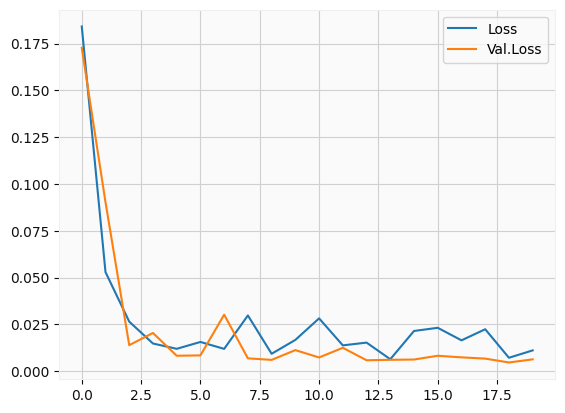

In [ ]:
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Val.Loss')
plt.legend(loc="upper right")
plt.show()

### Utilizzo e validazione del modello predittivo

In [ ]:
preds = model.predict([x_test_candles, x_test_time], batch_size=4096)

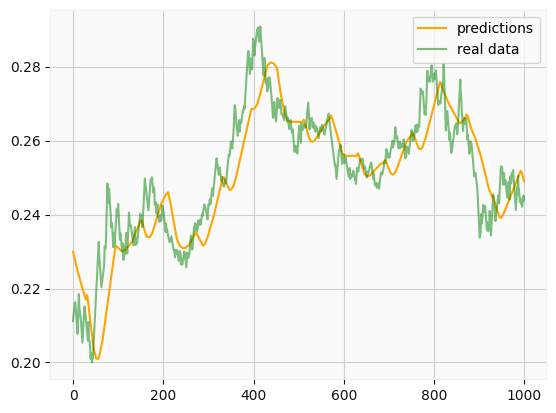

In [ ]:
plt.plot(preds[-1000:], color='orange', label='predictions')
plt.plot(y_test[-1000:], color='green', alpha=0.5, label='real data')
plt.legend()
plt.show()

In [ ]:
def log_return(series, periods=1):
    log_ret = np.log(series).diff(periods=periods)
    if periods < 0:
        log_ret*= -1.
    return log_ret

In [ ]:
df_pred_exp = pd.DataFrame(np.array([np.squeeze(preds),np.squeeze(y_test)]).T,columns=["Predicted","Expected"])

df_pred_exp["Return Expected"] = log_return(df_pred_exp["Expected"],periods=-1)
df_pred_exp["Return Predicted"] = log_return(df_pred_exp["Predicted"],periods=-1)


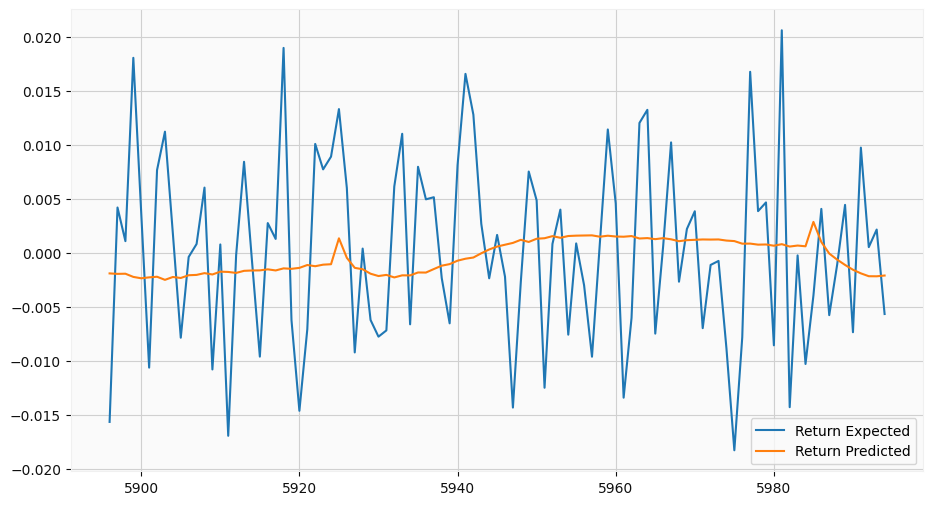

In [ ]:
f, axs = plt.subplots( figsize=(11, 6))
df_pred_exp.iloc[-100:].plot(y="Return Expected",ax=axs)
df_pred_exp.iloc[-100:].plot(y="Return Predicted",ax=axs)

In [ ]:
def denorm(value):
    example = [0.5 for x in range(9)]
    example[3] = value
    return scaler.inverse_transform([example])[0][3]

In [ ]:
def backtesting(fee=0.025):
    wallet = 0
    total_wallet_history = []
    single_wallet_history = []

    buys_cnt = 0
    buys_cnt_win = 0
    buys_cnt_losses = 0
    drawback = 0
    old_profit_negative = False
    old_profits = 0

    for i in range(split_point, len(x_candles)):
        prediction = preds[i - split_point][0]
        predicted_close = denorm(prediction)
        previous_close = denorm(candles_norm[i][3])
        real_next_close = denorm(candles_norm[i+1][3])

        if (previous_close + (previous_close * fee)) < predicted_close:  # buy
            profit = real_next_close - previous_close
            if profit > 0:
                profit = profit - (profit * fee)
                buys_cnt_win += 1
                old_profit_negative = False
            else:
                profit = profit + (profit * fee)
                buys_cnt_losses += 1
                if old_profit_negative:
                    old_profits += profit
                else:
                    old_profits = profit
                if old_profits < drawback:
                    drawback = old_profits
                old_profit_negative = True
            wallet += profit
            total_wallet_history.append(wallet)
            single_wallet_history.append(profit)
            buys_cnt += 1
        else:
            old_profit_negative = False
            old_profits = 0

    print('Fee:', fee)
    print('----------------------')
    print('Buy     ', buys_cnt, '(', buys_cnt_win, 'ok', buys_cnt_losses, 'ko )')
    print('No-op   ', (len(x_candles) - split_point) - buys_cnt)
    print('Wallet  ', wallet)
    print('Drawback', drawback)

    return total_wallet_history, single_wallet_history, wallet

total_wallet_history, single_wallet_history, wallet = backtesting(fee=0.025)

Fee: 0.025
----------------------
Buy      0 ( 0 ok 0 ko )
No-op    3996
Wallet   0
Drawback 0


Total earned 68262.60824999999


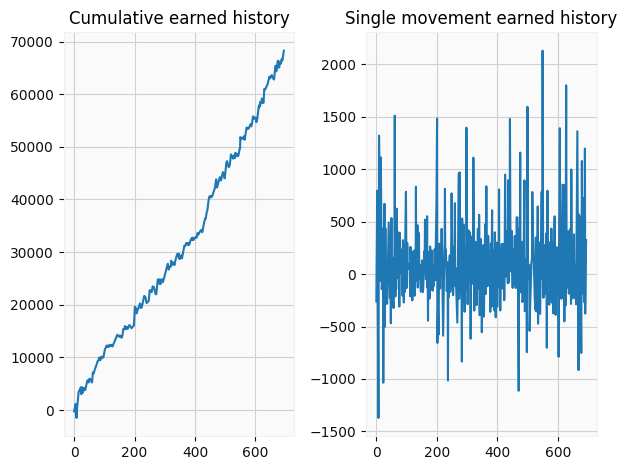

In [ ]:
print('Total earned', wallet)

plt.subplot(1, 2, 1)
plt.plot(total_wallet_history)
plt.title('Cumulative earned history')

plt.subplot(1, 2, 2)
plt.plot(single_wallet_history)
plt.title('Single movement earned history')

plt.tight_layout()
plt.show()

## addestramento su più epoche

In [ ]:
preds_old = preds
y_test_old = y_test

In [ ]:
many_epochs = 200
print(f'training on {many_epochs} epochs...')

model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='weights/weights',
    save_weights_only=True,
    monitor='loss',
    mode='min',
    save_best_only=True
)

history = model.fit(
    [x_train_candles, x_train_time], 
    y_train, 
    epochs=many_epochs,
    initial_epoch=21, 
    batch_size=4096,
    validation_data=([x_test_candles, x_test_time], y_test),
    callbacks=model_checkpoint_callback,
    verbose=1
)

training on 200 epochs...
Epoch 22/200
14/14 [==============================] - 1s 87ms/step - loss: 0.0096 - val_loss: 0.0068
Epoch 23/200
14/14 [==============================] - 1s 86ms/step - loss: 0.0094 - val_loss: 0.0147
Epoch 24/200
14/14 [==============================] - 1s 87ms/step - loss: 0.0093 - val_loss: 0.0066
Epoch 25/200
14/14 [==============================] - 1s 86ms/step - loss: 0.0092 - val_loss: 0.0154
Epoch 26/200
14/14 [==============================] - 1s 85ms/step - loss: 0.0091 - val_loss: 0.0069
Epoch 27/200
14/14 [==============================] - 1s 81ms/step - loss: 0.0093 - val_loss: 0.0143
Epoch 28/200
14/14 [==============================] - 1s 86ms/step - loss: 0.0091 - val_loss: 0.0071
Epoch 29/200
14/14 [==============================] - 1s 86ms/step - loss: 0.0090 - val_loss: 0.0149
Epoch 30/200
14/14 [==============================] - 1s 86ms/step - loss: 0.0089 - val_loss: 0.0070
Epoch 31/200
14/14 [==============================] - 1s 81ms/ste

In [ ]:
model.load_weights('weights/weights')

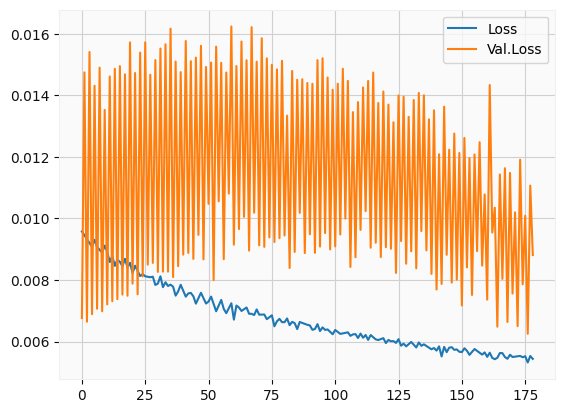

In [ ]:
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Val.Loss')
plt.legend(loc="upper right")
plt.show()

In [ ]:
preds = model.predict([x_test_candles, x_test_time], batch_size=4096)

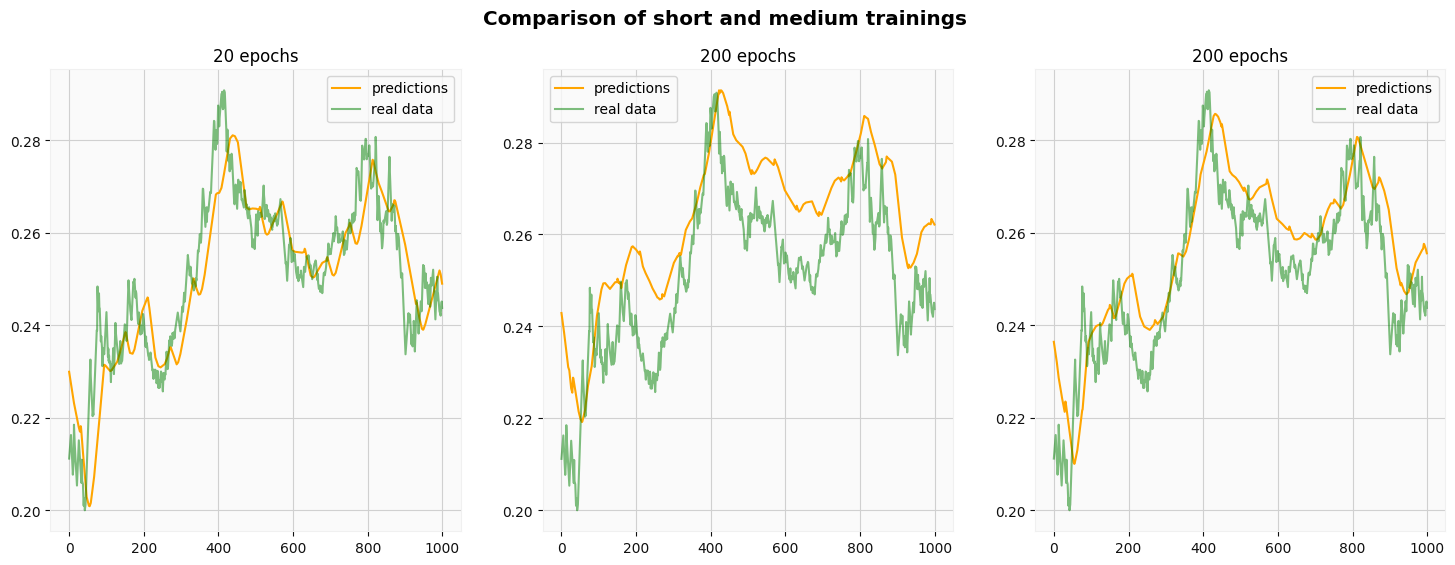

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.set_size_inches(18, 6)
fig.suptitle('Comparison of short and medium trainings')

ax1.set_title('20 epochs')
ax1.plot(preds_old[-1000:], color='orange', label='predictions')
ax1.plot(y_test_old[-1000:], color='green', alpha=0.5, label='real data')
ax1.legend()

ax2.set_title('200 epochs')
ax2.plot(preds[-1000:], color='orange', label='predictions')
ax2.plot(y_test[-1000:], color='green', alpha=0.5, label='real data')
ax2.legend()

ax3.set_title('200 epochs')
ax3.plot((preds[-1000:]+preds_old[-1000:])/2, color='orange', label='predictions')
ax3.plot(y_test[-1000:], color='green', alpha=0.5, label='real data')
ax3.legend()


plt.show()

In [ ]:
df_pred_exp = pd.DataFrame(np.array([np.squeeze(preds),np.squeeze(y_test)]).T,columns=["Predicted","Expected"])

df_pred_exp["Return Expected"] = log_return(df_pred_exp["Expected"],periods=-1)
df_pred_exp["Return Predicted"] = log_return(df_pred_exp["Predicted"],periods=-1)


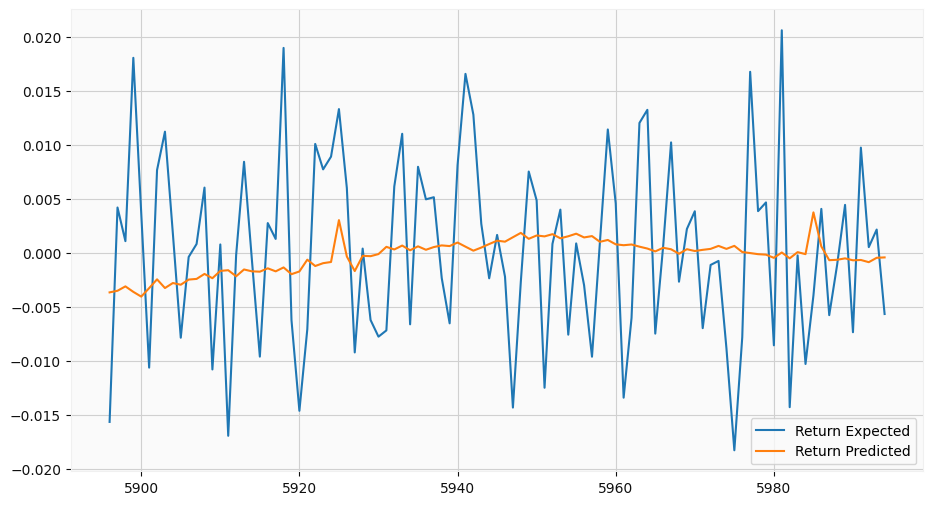

In [ ]:
f, axs = plt.subplots( figsize=(11, 6))
df_pred_exp.iloc[-100:].plot(y="Return Expected",ax=axs)
df_pred_exp.iloc[-100:].plot(y="Return Predicted",ax=axs)

In [ ]:
total_wallet_history, single_wallet_history, wallet = backtesting(fee=0.025)

Fee: 0.025
----------------------
Buy      1485 ( 832 ok 653 ko )
No-op    2845
Wallet   82080.603
Drawback -2639.5287500000013


Total earned 82080.603


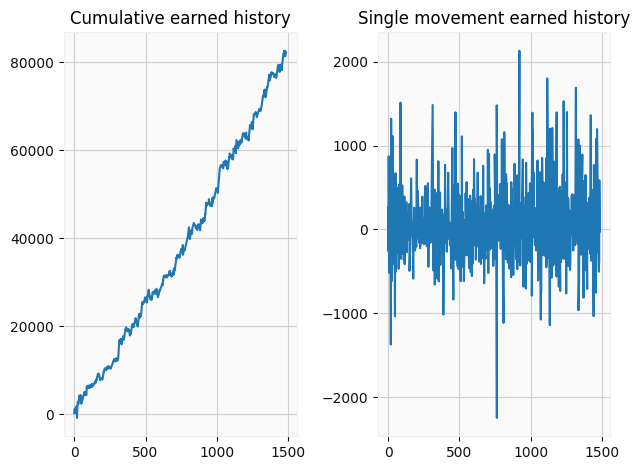

In [ ]:
print('Total earned', wallet)

plt.subplot(1, 2, 1)
plt.plot(total_wallet_history)
plt.title('Cumulative earned history')

plt.subplot(1, 2, 2)
plt.plot(single_wallet_history)
plt.title('Single movement earned history')

plt.tight_layout()
plt.show()